In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\ibm-hr-analytics-employee-attrition-performance.zip')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Distribution of employee attrition in the company

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

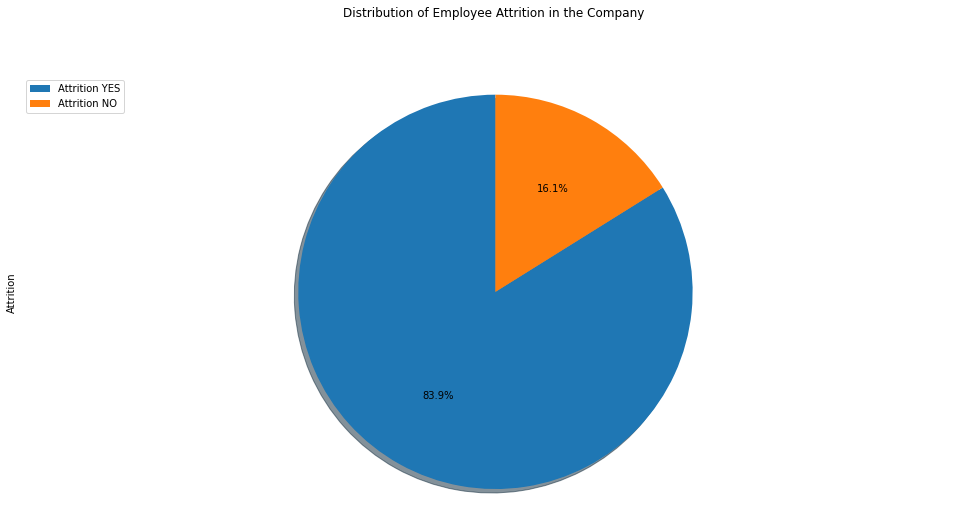

In [10]:
labels = 'Attrition YES','Attrition NO'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(17, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 

plt.legend(labels=labels, loc='upper left') 
plt.show()

In [11]:
df = df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


## From the Pie Chart, we can got to know that out of 1470 employees, 16.1% of the employees left their job due to some reasons whereas other 83.9% of the employees preferred to continue their job at the company.

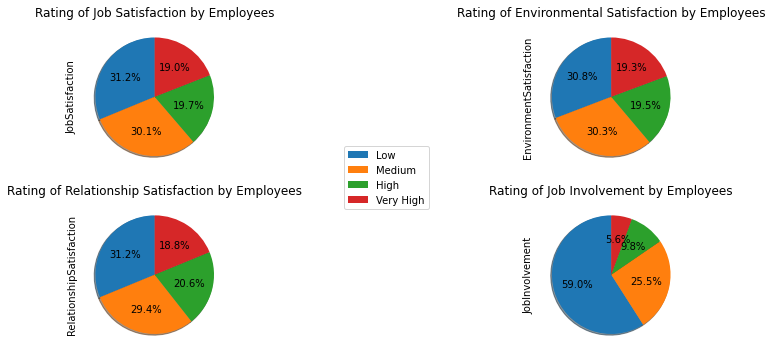

In [12]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')
df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

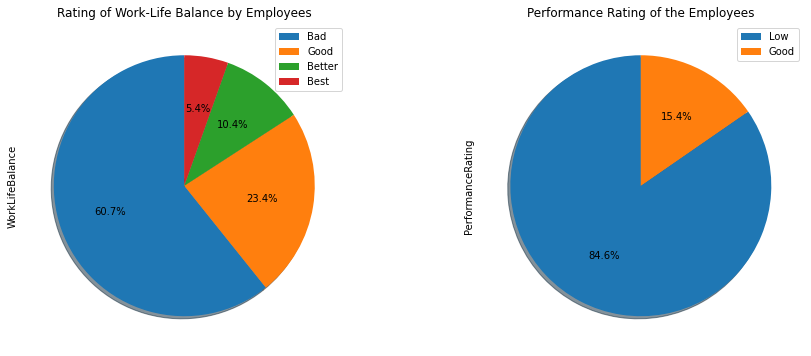

In [13]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

## Analysis of Business Travel

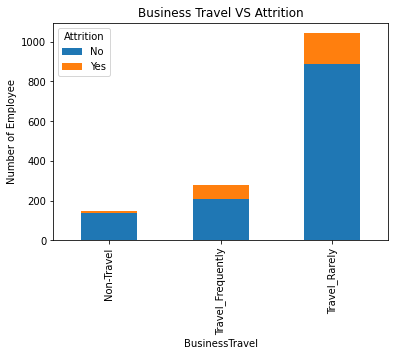

In [14]:
props = df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

## Analysis of work exp

In [15]:
wexp = df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
wexp.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


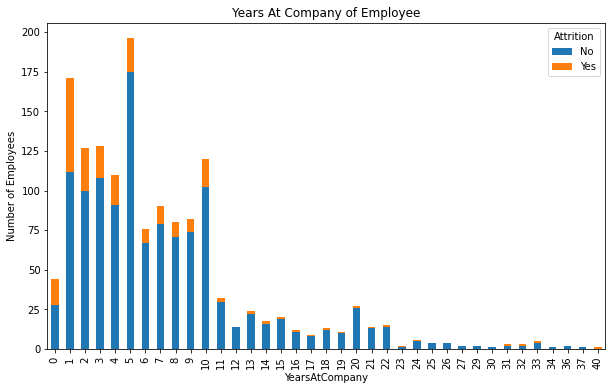

In [16]:
yacmp = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yacmp.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()


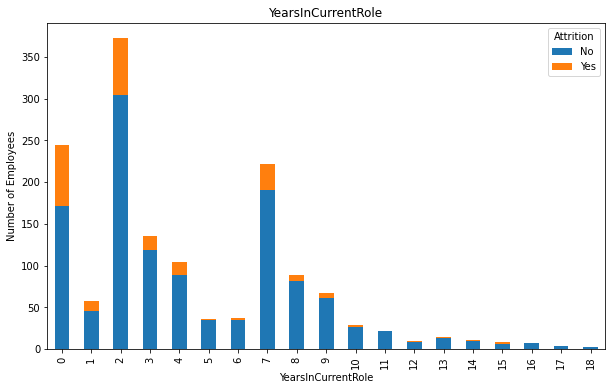

In [17]:
ycyrs = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()

ycyrs.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('YearsInCurrentRole')
plt.ylabel('Number of Employees')
plt.show()

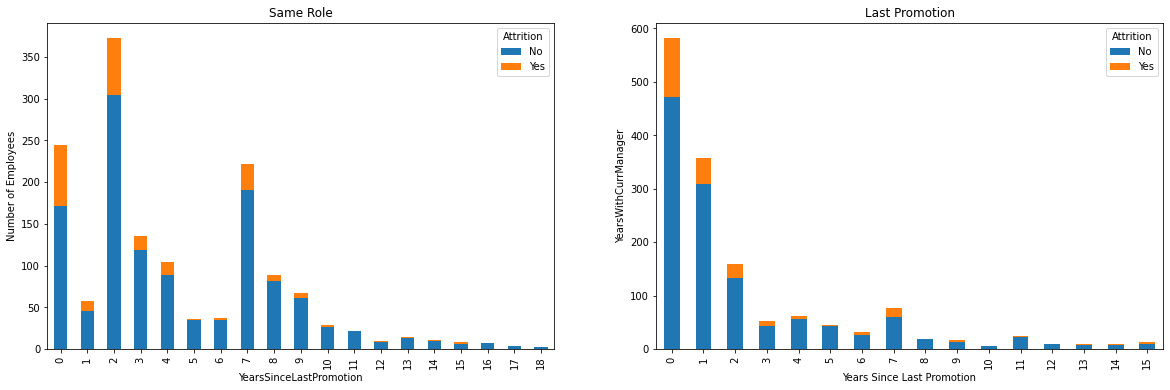

In [18]:
yslp = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()
ywcm = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycyrs.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('YearsSinceLastPromotion')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
yslp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('YearsWithCurrManager')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

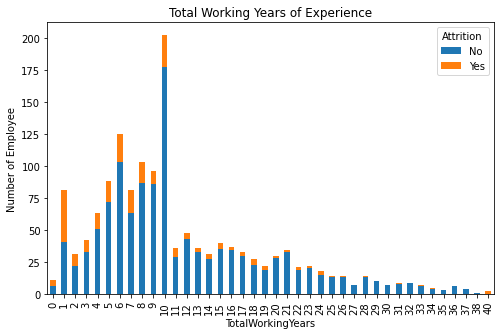

In [19]:
twy = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()


### It is observed that freshers leave the company very often soc ompany should focus on making a better policy.


## ANALYSIS OF MONTHLY INCOME

In [20]:
mi = df[df['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = df[df['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


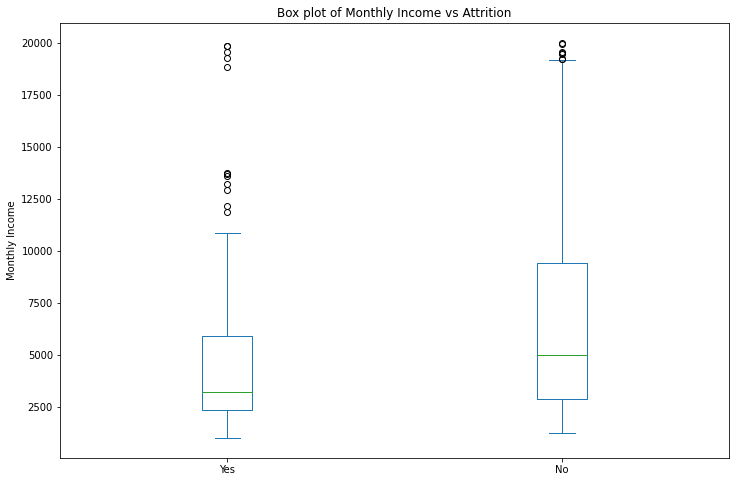

In [21]:
mi.plot(kind='box', figsize=(12, 8))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()


### Employess with low income left job early as comapred to hign income level people.


## OVERTIME EMPLOYEE ANALYSIS

In [22]:
dpt = df[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [23]:
dpt['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

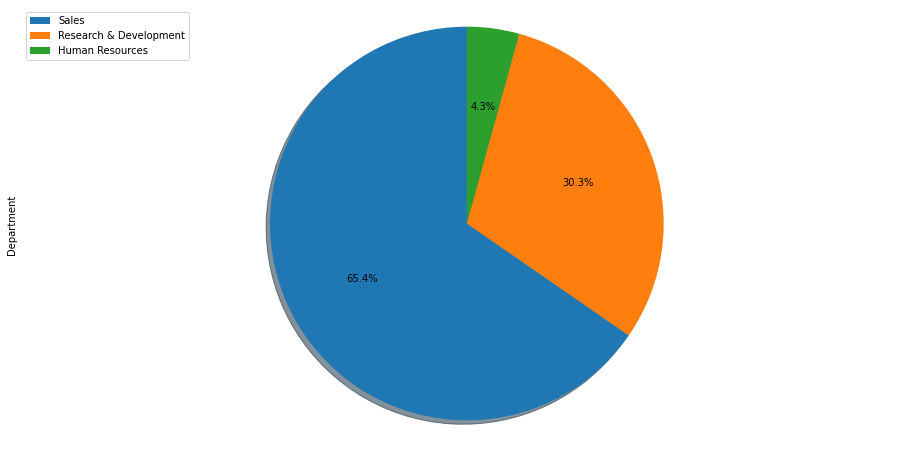

In [24]:
dpt['Department'].value_counts().plot(kind='pie',
                            figsize=(16, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=dpt['Department'].unique(), loc='upper left') 

In [25]:
dpm = df.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


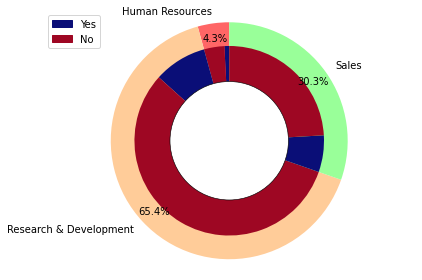

In [26]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.80,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.6)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.tight_layout()
plt.show()

## ANALYSIS OF GENDER

In [27]:
gda = df[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [28]:
gda['Gender'].value_counts()


Male      882
Female    588
Name: Gender, dtype: int64

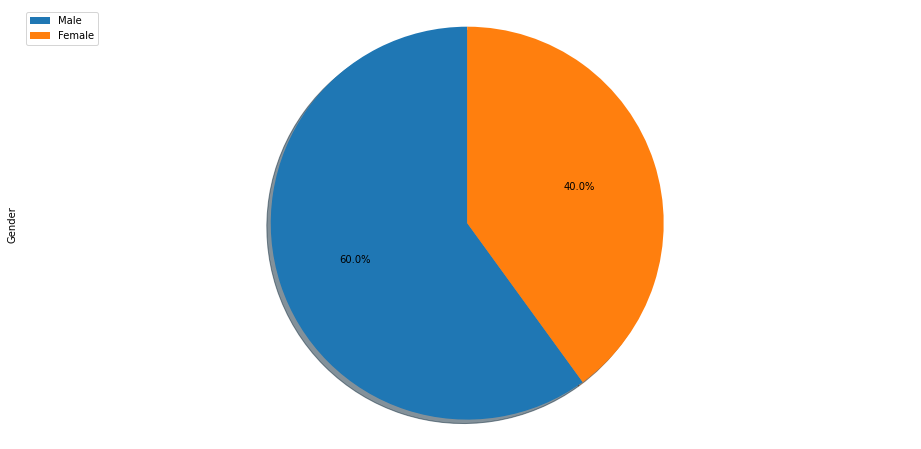

In [29]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(16, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper left') 

In [30]:
fm = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fm = fm.transpose()
fm

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


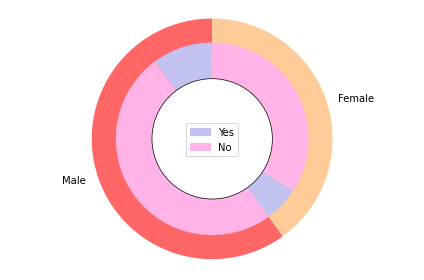

In [31]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.80,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.7)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

## ANALYSIS OF MARITAL STATUS

In [32]:
ms = df[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [33]:
ms['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

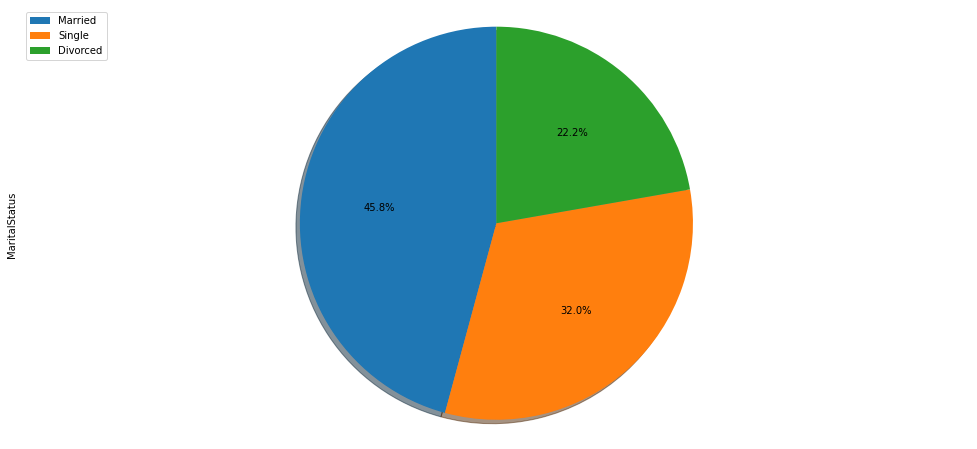

In [34]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(17, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left') 

In [35]:
ms = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
ms = ms.transpose()
ms

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


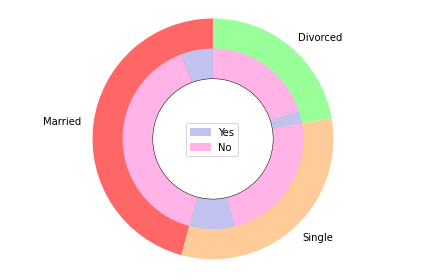

In [36]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 

plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

## MODEL DEVELOPMENT

In [37]:
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [38]:
df= pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\ibm-hr-analytics-employee-attrition-performance.zip')
df = df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','BusinessTravel','Department','EducationField',
                        'Gender','JobRole','MaritalStatus','OverTime']
for i in categorial_variables:
    df[i] = le.fit_transform(df[i])
df.head(5)
df.to_csv('LabelEncoded_CleanData.csv')

In [39]:
target = df['Attrition']
train = df.drop('Attrition',axis = 1)
train.shape

(1470, 29)

In [40]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression','SVM','KNN','Decision Tree','K Means Clustering']

In [41]:
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.33, random_state=40)

## Appling Linear regression

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

84.34959349593495 is the train accuracy
83.7448559670782 is the test accuracy


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
